<a href="https://colab.research.google.com/github/AnitaTasnim/Colab_Fetching_test/blob/main/Copy_of_lung_cancer_2nd_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BIO-ICT/ML in Bioinformatics: 4/LUNG-cancer_(Anita_Nipa)/lung_cancer_dataset_.csv')

In [5]:
df.head()

,Unnamed: 0,Gene ID,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
0,0,UMCU-HC-1-0197-TR824,12,116,68,75,51,37,61,91,...,340,584,68,181,873,40,70,39,0,2
1,1,UMCU-HC-1-0198-TR820,0,25,19,15,55,20,51,42,...,142,1299,19,509,1256,94,70,34,0,2
2,2,UMCU-HC-1-0199-TR825,72,56,21,29,45,18,18,45,...,143,322,18,81,665,56,35,42,0,2
3,3,UMCU-HC-1-0200-TR816,8,13,17,6,19,5,63,4,...,102,752,24,231,1526,93,70,42,0,2
4,4,UMCU-HC-1-0201-TR821,33,23,52,55,37,20,75,79,...,326,616,25,170,766,80,36,57,57,2


In [6]:
# Drop first column of dataframe
df = df.iloc[: , 1:]

In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 4724 columns):
 #     Column           Non-Null Count  Dtype 
---    ------           --------------  ----- 
 0     Gene ID          633 non-null    object
 1     ENSG00000000419  633 non-null    int64 
 2     ENSG00000000938  633 non-null    int64 
 3     ENSG00000001036  633 non-null    int64 
 4     ENSG00000001461  633 non-null    int64 
 5     ENSG00000001629  633 non-null    int64 
 6     ENSG00000001631  633 non-null    int64 
 7     ENSG00000002330  633 non-null    int64 
 8     ENSG00000002549  633 non-null    int64 
 9     ENSG00000002586  633 non-null    int64 
 10    ENSG00000002822  633 non-null    int64 
 11    ENSG00000002834  633 non-null    int64 
 12    ENSG00000003056  633 non-null    int64 
 13    ENSG00000003402  633 non-null    int64 
 14    ENSG00000003436  633 non-null    int64 
 15    ENSG00000003756  633 non-null    int64 
 16    ENSG00000004059  633 non-null    int64 


In [8]:
df.to_csv('hasib_dataset.csv')

In [9]:
df = df.drop([ 'Gene ID'], axis=1)

In [10]:
df.head()

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143,disease
0,12,116,68,75,51,37,61,91,5976,1,...,340,584,68,181,873,40,70,39,0,2
1,0,25,19,15,55,20,51,42,5811,6,...,142,1299,19,509,1256,94,70,34,0,2
2,72,56,21,29,45,18,18,45,3677,55,...,143,322,18,81,665,56,35,42,0,2
3,8,13,17,6,19,5,63,4,4001,2,...,102,752,24,231,1526,93,70,42,0,2
4,33,23,52,55,37,20,75,79,7654,8,...,326,616,25,170,766,80,36,57,57,2


convert object type to int

#X Y specification

In [11]:
X = df.drop(['disease'], axis=1)

In [12]:
y = df['disease']

In [13]:
X.shape

(633, 4722)

In [14]:
y = y.replace([4,2], [1,0])

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: disease, dtype: int64

1 denotes sample having lung cancer


0 denotes sample is healthy 

In [16]:
y.value_counts()

1    402
0    231
Name: disease, dtype: int64

In [17]:
df.shape

(633, 4723)

In [18]:
X.shape

(633, 4722)

In [19]:
from imblearn.over_sampling import RandomOverSampler 

In [20]:
random_over = RandomOverSampler(random_state = 42)
X_oversample, y_oversample = random_over.fit_resample(X, y)

In [21]:
X_oversample.shape

(804, 4722)

In [22]:
y_oversample.shape

(804,)

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Train Test Split</b></p>
</div>

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_oversample,y_oversample,random_state=None,stratify=y_oversample,train_size=.80)
print(f'Train shape : {xtrain.shape}\nTest shape: {xtest.shape}')

Train shape : (643, 4722)
Test shape: (161, 4722)


In [24]:
y_oversample.value_counts()

0    402
1    402
Name: disease, dtype: int64

In [44]:
from sklearn.svm import NuSVC
clf=NuSVC(nu=.2015230,kernel='rbf',gamma='scale',tol =1e-13)

In [45]:
clf.fit(xtrain, ytrain)
clf.score(xtest,ytest)

0.937888198757764

In [46]:
clf_y=clf.predict(xtest)
from sklearn.metrics import confusion_matrix

Text(24.58, 0.5, 'Actual')

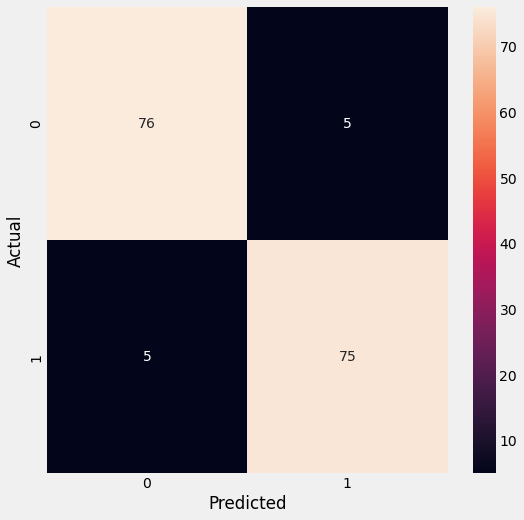

In [47]:
confusion_svc=confusion_matrix(ytest,clf_y)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [175]:
from sklearn.svm import SVC

In [191]:
model = SVC(C=.00221, kernel='linear', degree=3, gamma='scale')
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

model.score(xtest,ytest)

0.937888198757764

In [192]:
y__svc=model.predict(xtest)

Text(24.58, 0.5, 'Actual')

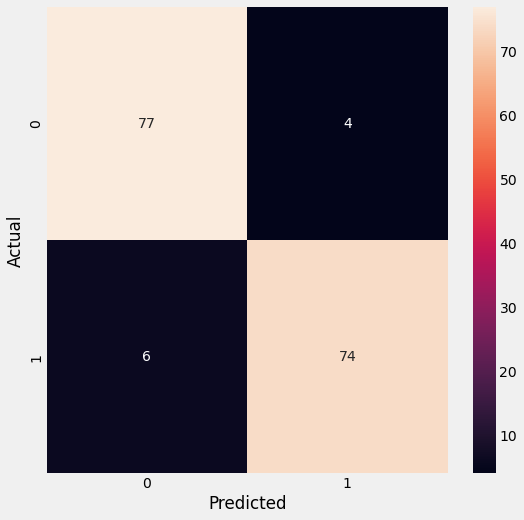

In [193]:
confusion_svc=confusion_matrix(ytest,y__svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [65]:
from sklearn.svm import LinearSVC

In [171]:
cl1j = LinearSVC(random_state=0 , C=0.000100111120001, loss = 'squared_hinge',penalty='l1', dual=False, tol=0.0000000001,)#, tol=0.1110110000003 , loss='squared_hinge'

In [172]:
cl1j.fit(xtrain, ytrain)
cl1j.score(xtest,ytest)

0.968944099378882

In [173]:
y__svc=cl1j.predict(xtest)

Text(24.58, 0.5, 'Actual')

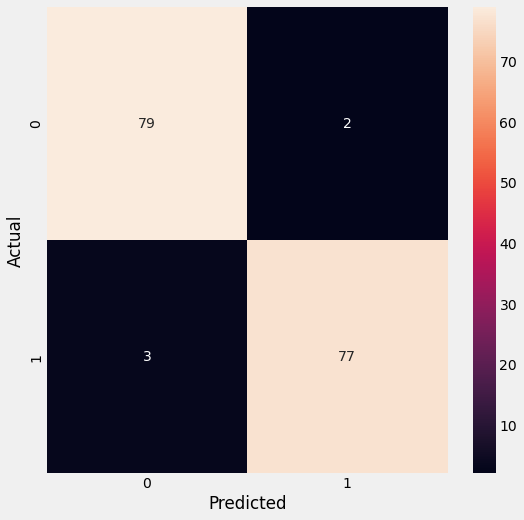

In [174]:
confusion_svc=confusion_matrix(ytest,y__svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [194]:


from sklearn.linear_model import LogisticRegression

In [198]:
logistic_model = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter = 10, C = 2.8, random_state = 11)

logistic_model.fit(xtrain, ytrain)

logistic_model.score(xtest,ytest)

0.968944099378882

In [199]:
y__log=logistic_model.predict(xtest)

Text(24.58, 0.5, 'Actual')

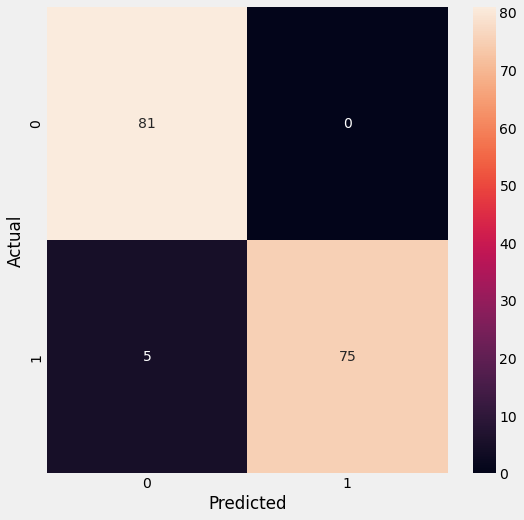

In [200]:
confusion_svc=confusion_matrix(ytest,y__log)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [130]:


from sklearn.linear_model import LogisticRegression

In [132]:
logistic_model = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter = 10, C = 2.8, random_state = 1)

logistic_model.fit(xtrain, ytrain)

logistic_model.score(xtest,ytest)

0.9440993788819876

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model_knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 10)

model_knn.fit(xtrain, ytrain)
KNeighborsClassifier(n_neighbors=10, weights='distance')
model_knn.score(xtest,ytest)

0.6956521739130435

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost 
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth=4000, learning_rate=0.98971, n_estimators=1000)

In [ ]:
xgb.fit(xtrain,ytrain)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(ytest,xgb.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, criterion = 'entropy')

random_forest_model.fit(xtrain, ytrain)
RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=200)
random_forest_model.score(xtest,ytest)

In [ ]:
xgb.score(xtest,ytest)

0.9375

In [ ]:
from sklearn.naive_bayes import CategoricalNB 
from sklearn.naive_bayes import GaussianNB 

In [ ]:
cnb = CategoricalNB()
cnb.fit(xtrain, ytrain)

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
cnb.score(xtrain, ytrain)

0.6304347826086957

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_cnb = cnb.predict(xtest)
y_prob_pred_cnb = cnb.predict_proba(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_cnb).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))

IndexError: ignored

In [ ]:
import pytest
gnb.predict

<bound method _BaseNB.predict of CategoricalNB()>

In [ ]:
gnb.predict(xtest)

IndexError: ignored

In [ ]:
gnb.predict == xtest.shape()

In [ ]:
expected_msg = "A category unseen during training is present in feature 0"
assert_raise_message(ValueError, expected_msg, gnb.predict, xtest)

NameError: ignored

In [ ]:
from sklearn.naive_bayes import CategoricalNB  
gnb = CategoricalNB(min_categories = 160)
gnb.fit(xtrain, ytrain)
  


CategoricalNB(min_categories=160)

In [ ]:
# making predictions on the testing set
y_pred = gnb.predict(xtest)
#axis 0 represents row
#axis 1 represents column

IndexError: ignored

In [ ]:
features = np.array([[5, 2.9, 1, 0.2]])
# using inputs to predict the output
prediction = knn.predict(features)

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
247,0.569418,0.542579,0.504538,0.836986,0.171009,0.374494,0.370273,1.571497,1.005490,0.062579,...,0.514437,0.417690,1.115184,0.070388,0.929278,0.742105,0.362263,1.506552,0.576904,0.617484
390,1.190844,0.239254,1.706053,0.691019,0.323313,1.459041,0.795294,0.921061,0.441147,2.486198,...,1.140942,0.585734,1.349602,0.336327,0.899341,0.941188,0.579624,0.480066,0.146116,0.244111
145,1.605129,0.444125,0.351174,2.131008,0.731691,0.603199,0.018249,0.838031,1.157424,0.071667,...,0.811846,0.219405,0.027525,0.331788,0.495940,1.009962,1.078269,0.678728,0.112357,0.247937
497,0.569865,0.143620,0.408643,0.152551,0.397081,0.127026,0.674311,0.201461,0.298371,0.062579,...,0.025656,0.084290,0.290743,0.121124,0.336041,0.071530,0.438240,0.612508,0.000702,0.564145
513,0.880131,0.618058,0.589688,0.188039,0.321724,0.615381,0.102734,0.158339,0.130522,0.668389,...,0.011520,0.195782,0.409582,0.121124,0.122476,0.290439,0.992291,0.117037,0.431491,0.354615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.880578,0.122055,0.789776,0.103895,0.580976,0.120443,0.950703,0.699646,0.509779,0.062579,...,1.084139,0.242489,2.423515,3.272542,2.138035,1.299400,2.795827,1.638993,0.663062,0.621310
457,0.362275,0.413187,0.137246,1.157895,0.323313,0.056718,1.183816,0.947103,0.269900,0.004355,...,0.365732,0.369908,1.334747,0.789239,0.875612,0.590078,1.133674,0.976787,0.112357,2.262823
79,0.880578,0.186751,0.375760,0.723251,0.171009,0.367912,0.674311,0.173784,0.778772,0.331828,...,0.657651,1.008078,0.244029,0.201088,0.280926,0.607244,0.050405,0.744949,1.119348,0.247937
23,0.983702,0.229881,1.492125,0.282094,0.959353,0.780360,1.535840,0.781042,0.178706,0.466452,...,2.236601,1.780287,1.688203,0.985289,1.046478,4.557121,4.513384,0.115919,1.007693,0.609313


In [ ]:
xtest.shape

(159, 4722)

In [ ]:
y.value_counts()

1    402
0    231
Name: disease, dtype: int64

**KNeighbors Classifier - 97%**

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid={'n_neighbors':[1,3,5,7,11,13,51,101,501,301,201,33], 'weights':['uniform', 'distance']}

In [ ]:
rcv_knn=RandomizedSearchCV(knn,param_grid,cv=5, random_state=42)
rcv_knn.fit(xtrain,ytrain)

RandomizedSearchCV(cv=50, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 11, 13, 51,
                                                        101, 501, 301, 201,
                                                        33],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [ ]:
y_pred_knn=rcv_knn.predict(xtest)

In [ ]:
ytest.shape

(159,)

In [ ]:
xtest.shape

(159, 4722)

Text(24.58, 0.5, 'Actual')

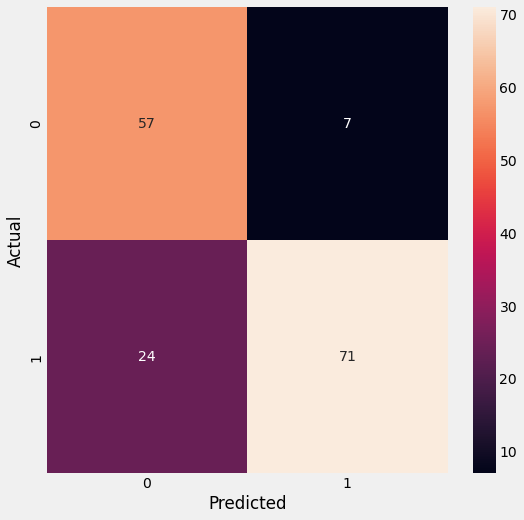

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(ytest,rcv_knn.predict(xtest))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred_knn))
print(f'\nBest Parameters of KNN  model is : {rcv_knn.best_params_}\n')

              precision    recall  f1-score   support

           0       0.70      0.89      0.79        64
           1       0.91      0.75      0.82        95

    accuracy                           0.81       159
   macro avg       0.81      0.82      0.80       159
weighted avg       0.83      0.81      0.81       159


Best Parameters of KNN  model is : {'weights': 'distance', 'n_neighbors': 5}



In [ ]:
rcv_knn.score(xtest,ytest)

0.8050314465408805

crosscheck

In [ ]:
model_knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 9)

model_knn.fit(xtrain, ytrain)
model_knn.score(xtest,ytest)
model_knn.score(xtest,ytest)

0.8050314465408805

# K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [ ]:
kfold = KFold(n_splits=5) #each fold contain 25% data

In [ ]:
result = cross_val_score(rcv_knn,xtrain, ytrain,cv=kfold) 

In [ ]:
result

array([0.71578947, 0.77894737, 0.70526316, 0.77894737, 0.69148936])

In [ ]:
result.mean()

0.734087346024636

In [ ]:
cross_validate = cross_validate(rcv_knn,xtrain, ytrain,cv=kfold)

KeyboardInterrupt: ignored

In [ ]:
cross_validate

In [ ]:
result.max()

In [ ]:
result.min()

In [ ]:
result.mean()

# Stratified k fold cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
st = StratifiedKFold(n_splits=4)

In [ ]:
score2 = cross_val_score(rcv_knn,xtrain, ytrain,cv=kfold)

In [ ]:
score2

array([0.71578947, 0.77894737, 0.70526316, 0.77894737, 0.69148936])

In [ ]:
score2.max()

0.7789473684210526

In [ ]:
score2.min()

0.6914893617021277

In [ ]:
score2.mean()

0.734087346024636

#over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Randomly over sample the minority class
random = RandomOverSampler(random_state=42)
x_new, y_new= random.fit_resample(X, y)
# Check the number of records after over sampling
#print(sorted(Counter(ytrain_smote).items()))

In [ ]:
x_new.shape

(804, 4722)

In [ ]:
y_new.shape

(804,)

In [ ]:
type(x_new)

pandas.core.frame.DataFrame

In [ ]:
type(y_new)

pandas.core.series.Series

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Train Test Split</b></p>
</div>

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_new,y_new,random_state=42,train_size=.75)
print(f'Train shape : {xtrain.shape}\nTest shape: {xtest.shape}')

Train shape : (603, 4722)
Test shape: (201, 4722)


In [ ]:
y_new.value_counts()

0    402
1    402
Name: disease, dtype: int64

In [ ]:
print(x_new.duplicated().sum())

171


In [ ]:
xtrain.head()

,ENSG00000000419,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002822,...,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,ENSG00000273143
181,52,104,53,30,30,25,33,72,4351,81,...,210,49,280,21,106,376,44,56,43,1
628,1,1,1,0,5,0,0,3,412,1,...,18,14,46,1,17,74,0,6,5,0
742,26,181,8,26,13,38,8,46,561,36,...,11,26,39,0,23,33,7,0,9,0
723,24,89,43,87,24,27,38,37,2567,26,...,103,151,436,36,123,465,69,23,34,3
158,23,243,11,12,5,5,9,79,1000,44,...,30,28,60,10,15,136,6,1,26,0


In [ ]:
#remove outleirs from data set
low, high = df.quantile([0.1,0.9]) ## now we will do unpacking to get the values 31 and 100 what we actually need. we can unpack series also.


ValueError: ignored

In [ ]:
#remove outleirs by 'surface_covered_in_m2'
    low, high = df['surface_covered_in_m2'].quantile([0.1,0.9]) ## now we will do unpacking to get the values 31 and 100 what we actually need. we can unpack series also.
    mask_area = df['surface_covered_in_m2'].between(low,high)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

for column in X.columns:
    
    xtrain_sc[column] = scaler.fit_transform(xtrain_sc[[column]])
    xtest_sc[column] = scaler.transform(xtest_sc[[column]])
    
    pass
    